In [1]:
# --- Step 1: Import Necessary Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Import the built-in Wine dataset from sklearn
from sklearn.datasets import load_wine

# Set Seaborn style for better visualization
sns.set_style("whitegrid")

In [3]:
# --- Step 2: Load and Prepare the Dataset (Wine Dataset) ---

# Load the Wine dataset
wine = load_wine()
# Convert the data to a DataFrame for easier manipulation and inspection
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target # Add the target column

print("--- First 5 Rows of the Wine Dataset ---")
print(df.head())
print("\n" + "="*60 + "\n")

print("--- Dataset Information ---")
df.info()
print("\n" + "="*60 + "\n")

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Get class names (the cultivar types) for labeling
class_names = wine.target_names


--- First 5 Rows of the Wine Dataset ---
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_dil

In [4]:
# --- Step 3: Split Data into Training and Testing Sets ---
# Using 70% training and 30% testing split
# We use stratify=y to ensure the class proportions are maintained in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("--- Data Split ---")
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")
print("\n" + "="*60 + "\n")


--- Data Split ---
Training Data Shape: (124, 13)
Testing Data Shape: (54, 13)




In [5]:
# --- Step 4: Implement Bayesian Decision Theory using Gaussian Naive Bayes ---

# Initialize the Gaussian Naive Bayes classifier
# This model assumes the features follow a Gaussian (Normal) distribution within each class.
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")
print("The model has learned the prior probabilities and likelihood distributions (Gaussian parameters).")
print("\n" + "="*60 + "\n")


Model training complete.
The model has learned the prior probabilities and likelihood distributions (Gaussian parameters).




In [6]:
# --- Step 5: Make Predictions on the Test Set ---
y_pred = model.predict(X_test)

# Posterior probabilities for each class (P(Class|Features))
posterior_probs = model.predict_proba(X_test)


--- Model Evaluation ---
Accuracy: 100.00%
Accuracy represents the proportion of correctly classified samples.

--- Classification Report (Precision, Recall, F1-Score) ---
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



--- Confusion Matrix ---
Confusion matrix plot saved as 'confusion_matrix_wine_bayes.png'




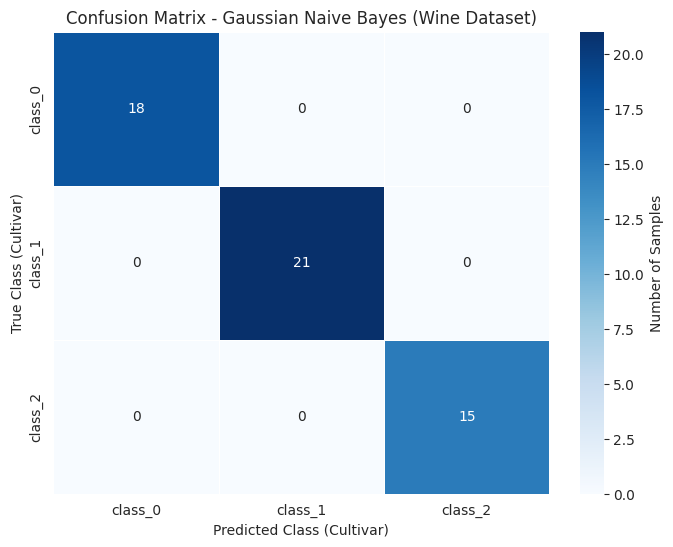

In [7]:
# --- Step 6: Evaluate the Classifier's Performance ---

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Model Evaluation ---")
print(f"Accuracy: {accuracy:.2%}")
print("Accuracy represents the proportion of correctly classified samples.\n")

# Classification Report
print("--- Classification Report (Precision, Recall, F1-Score) ---")
print(classification_report(y_test, y_pred, target_names=class_names))
print("\n" + "="*60 + "\n")

# Confusion Matrix
print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            linewidths=.5, cbar_kws={'label': 'Number of Samples'})
plt.xlabel('Predicted Class (Cultivar)')
plt.ylabel('True Class (Cultivar)')
plt.title('Confusion Matrix - Gaussian Naive Bayes (Wine Dataset)')

plt.savefig('confusion_matrix_wine_bayes.png')
print("Confusion matrix plot saved as 'confusion_matrix_wine_bayes.png'")
print("\n" + "="*60 + "\n")

In [8]:
# --- Step 7: Interpretation of a Prediction Example ---
print("--- Example of a Single Prediction ---")

# Choose a sample from the test set
sample_index = 3
sample_features = X_test.iloc[sample_index].values
true_class = y_test.iloc[sample_index]
predicted_class_index = y_pred[sample_index]
probabilities = posterior_probs[sample_index]

print(f"Features of Sample #{sample_index}: {sample_features}")
print(f"True Class: {class_names[true_class]} (Index: {true_class})")
print(f"Predicted Class (Highest Probability): {class_names[predicted_class_index]} (Index: {predicted_class_index})\n")

print("Posterior Probabilities calculated by the model:")
for i, class_name in enumerate(class_names):
    print(f"  P(Class {class_name} | features) = {probabilities[i]:.4f}")



--- Example of a Single Prediction ---
Features of Sample #3: [1.406e+01 2.150e+00 2.610e+00 1.760e+01 1.210e+02 2.600e+00 2.510e+00
 3.100e-01 1.250e+00 5.050e+00 1.060e+00 3.580e+00 1.295e+03]
True Class: class_0 (Index: 0)
Predicted Class (Highest Probability): class_0 (Index: 0)

Posterior Probabilities calculated by the model:
  P(Class class_0 | features) = 1.0000
  P(Class class_1 | features) = 0.0000
  P(Class class_2 | features) = 0.0000
